There are many methods to scrap the currency exchange. One of them is scrap directly to website www.fxtop.com. The data scrapped
is currency exchange IDR per 1 USD in range May 08 2020 to May 08 2021. This method can be more effective because the data has
scrapped only need start and end date imputation. The data has uploaded at 
https://github.com/handrimaulud/data-science/blob/main/Dataset/usd_idr.csv

In [43]:
#Import the currency exchange in range May 08 2020  May 08 2021
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/handrimaulud/data-science/main/Dataset/usd_idr.csv', sep=';')
print(df.head())

     DATETIME           IDR
0  2020-05-08  14967.499769
1  2020-05-09  14967.499769
2  2020-05-10  14967.499769
3  2020-05-11  14968.883962
4  2020-05-12  14803.499724


In [44]:
#Summary the dataset
print("Summary")
print(df.describe())
print("")
print("Date at IDR min")
print(df[df["IDR"] == df["IDR"].min()])
print("")
print("Date at IDR max")
print(df[df["IDR"] == df["IDR"].max()])

Summary
                IDR
count    366.000000
mean   14434.461766
std      293.247909
min    13876.602147
25%    14162.802393
50%    14425.001015
75%    14695.003500
max    14992.922220

Date at IDR min
       DATETIME           IDR
241  2021-01-04  13876.602147

Date at IDR max
       DATETIME          IDR
126  2020-09-11  14992.92222
127  2020-09-12  14992.92222
128  2020-09-13  14992.92222


<b> EXPLORATORY DATA ANALYS </b>

In [49]:
#Split DATETIME into Year, Month, Day variable
df[["Year", "Month", "Day"]] = df["DATETIME"].str.split('-', expand=True)
#Calculate IDR average per month
IDR_mean = df.groupby(["Year","Month"])["IDR"].mean().to_frame()
print(IDR_mean)

                     IDR
Year Month              
2020 05     14821.808034
     06     14194.238450
     07     14540.758792
     08     14712.044169
     09     14833.720964
     10     14734.439556
     11     14222.450619
     12     14154.736541
2021 01     14058.484036
     02     14068.882762
     03     14401.280600
     04     14539.731615
     05     14375.324039


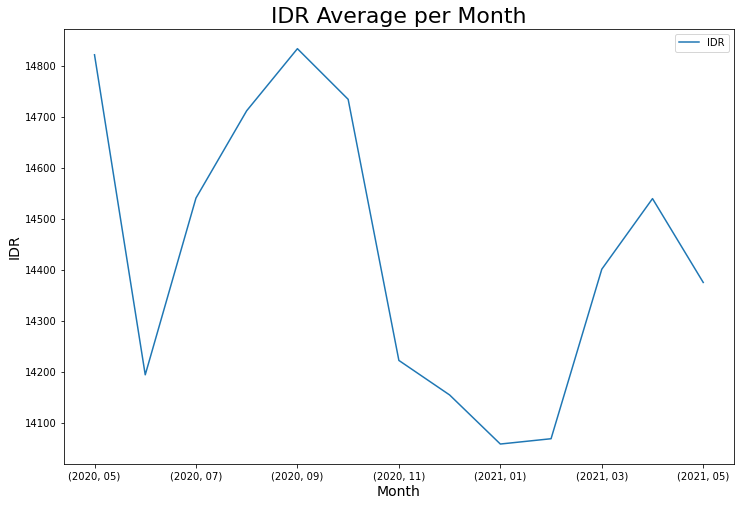

In [50]:
#Visualize IDR average per month
import matplotlib.pyplot as plt
IDR_mean.plot(figsize=(12,8))
plt.xlabel("Month", fontsize=14)
plt.ylabel("IDR", fontsize=14)
plt.title("IDR Average per Month", fontsize=22)
plt.show()

According to summary of dataset, IDR has a minimum value Rp. 13876.602147 at January 04 2021, while IDR has a maximum value
Rp. 14992.922 at September 11 2020 - September 13 2020. Otherwhile, the IDR average value Rp. 14434.461766 with standard
deviation Rp. 293.247909. The tren of IDR per month can see clearly at the graph shown above.

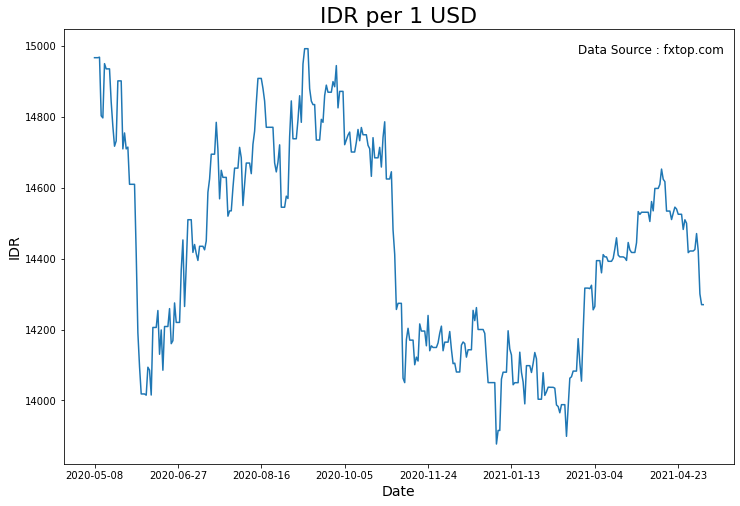

In [51]:
#Looking for IDR tren by the time
import matplotlib.pyplot as plt
df.set_index("DATETIME", inplace=True)
df["IDR"].plot(figsize=(12,8))
plt.title("IDR per 1 USD", fontsize=22)
plt.xlabel("Date", fontsize=14)
plt.ylabel("IDR", fontsize=14)
plt.text(290, 14980, "Data Source : fxtop.com", fontsize=12)
plt.show()

According to graph, the IDR tren has a fluxtuation time by time. As general, IDR become better at early May 2020, and become 
worse at early November 2020 or mid of fourth quatal. This situation indicate the Indonesia economy is unstable due to pandemic
effect. Nevertheless, IDR become stronger at January 04 2021. Certainly this is good news for Indonesia economy at early 2021.
There are some factors occur IDR become better, one of them is the vaccine of covid-19 dicovered. Another day, at second
quartal, ID become worse instead of pandemic cases in whole word like India, Europa, and America which is harras the global
economy include Indonesia itself.

<b> F O R E C A S T </b>

Forecasting is one of method in Machine learning to predict the value, number in future. There are many method usually in
forecasting, like linear regression, inversion, fbprophet algorithm, moving average, etc. At this case, the type of dataset is
time series or historical data, thus the method could be using a fbprophet algorithm. Fbprophet algorithm is made by Facebook
to predict business in future by knowing the pattern or tren of data. Nevertheless, at this same case, the method also will be 
used a polynomial regression. The model of both will be compared each other for get the best model to predict value in future.


<b> M E T H O D - F B P R O P H E T </b>

In [53]:
#Import package fbprophet
from fbprophet import Prophet
model = Prophet(interval_width=0.8)
#rename DATETIME and IDR to fbprophet format
df = df.reset_index()
df = df.rename(columns={'DATETIME' : 'ds', 'IDR': 'y'})
#Fitting the prophet model into dataset
model.fit(df)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [61]:
#Create the date from May 09 2021 - May 15 2021
from datetime import timedelta, date

def daterange(start_date, end_date):
    for n in range(int((end_date - start_date).days)):
        yield start_date + timedelta(n)
dates = []
start_date = date(2021, 5, 9)
end_date = date(2021, 5, 16)
for single_date in daterange(start_date, end_date):
    date_in = single_date.strftime("%Y-%m-%d")
    dates.append(date_in)
column = ['ds']
future = pd.DataFrame(dates, columns=column)
print(future)

           ds
0  2021-05-09
1  2021-05-10
2  2021-05-11
3  2021-05-12
4  2021-05-13
5  2021-05-14
6  2021-05-15


In [62]:
#Predict the IDR one week in future
forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,2021-05-09,14601.050733,14478.028475,14730.585833
1,2021-05-10,14599.802630,14477.965289,14721.898022
2,2021-05-11,14595.609239,14462.356310,14724.583758
3,2021-05-12,14591.650333,14466.764331,14719.440552
4,2021-05-13,14607.052174,14478.562248,14736.439097
5,2021-05-14,14614.943085,14479.244579,14747.930364
6,2021-05-15,14620.707767,14488.087707,14740.466035


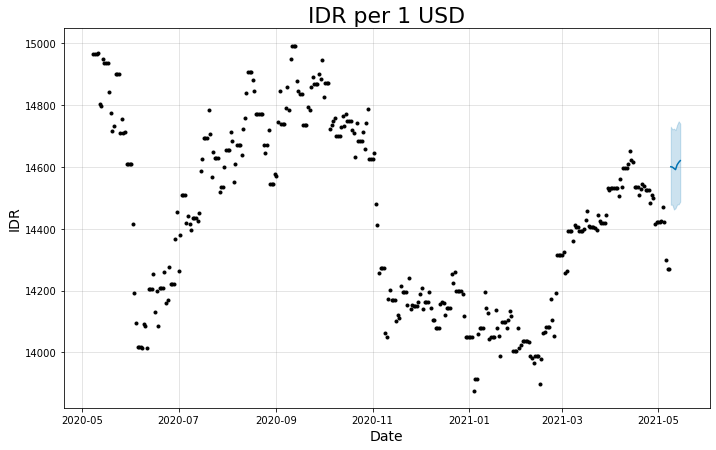

In [63]:
#Visualize of IDR predicted
nilai_IDR_pred = model.plot(forecast)
plt.title("IDR per 1 USD", fontsize=22)
plt.xlabel("Date", fontsize=14)
plt.ylabel("IDR", fontsize=14)
plt.show()

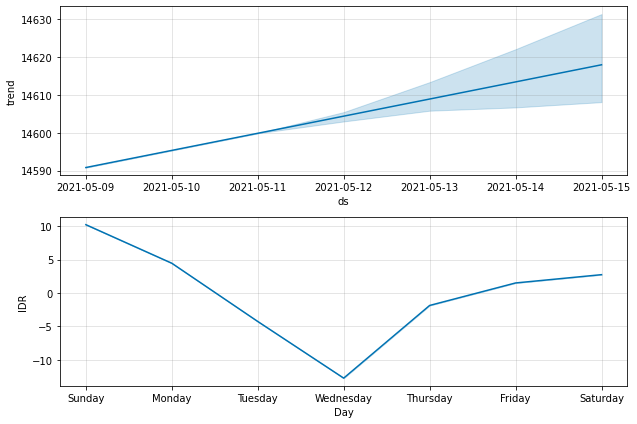

In [64]:
nilai_IDR_pred_komponen = model.plot_components(forecast)
plt.xlabel("Day")
plt.ylabel("IDR")
plt.show()

After the model has fitted to the dataset and predicted the value in a week. The result can be analyze. According to the graph,
as general, the IDR will be decrease and the will be increase, which is the maximum of IDR estimated Rp. 14619.980653 at May 15
2021, and minimum of IDR estimated Rp. 14590.980286 at May 12 2021, or the value can be seen at the graph shown above marked by 
blue line. At forecast data, <i> yhat </i> is average value predicted, <i> yhat_lower </i> is minimum value predicted, and <i>
yhat_upper </i> is maximum value predicted.

<b> M E T H O D - P O L Y N O M I A L </b>

This method is one of the machine learning regression algorithm. This algorithm can predict a value or number by knowing the
pattern or tren in historical data. At this case, the model will be used 5 - 7 degree polynomial.

In [66]:
#Train the data using machine learning package - skit learn
from sklearn.model_selection import train_test_split
day_at = []
for i in range(1,367,1):
    day_at.append(i)
column = ['day_at']
X = pd.DataFrame(day_at, columns=column)
y = df['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=80, random_state=0)

In [67]:
#create 5 degree polynomial model
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
polyreg5=make_pipeline(PolynomialFeatures(5),LinearRegression())
polyreg5.fit(X,y)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=5)),
                ('linearregression', LinearRegression())])

In [68]:
#Create 6 degree polynomial model
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
polyreg6=make_pipeline(PolynomialFeatures(6),LinearRegression())
polyreg6.fit(X,y)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=6)),
                ('linearregression', LinearRegression())])

In [69]:
#Create 7 degree polynomial model
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
polyreg7=make_pipeline(PolynomialFeatures(7),LinearRegression())
polyreg7.fit(X,y)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=7)),
                ('linearregression', LinearRegression())])

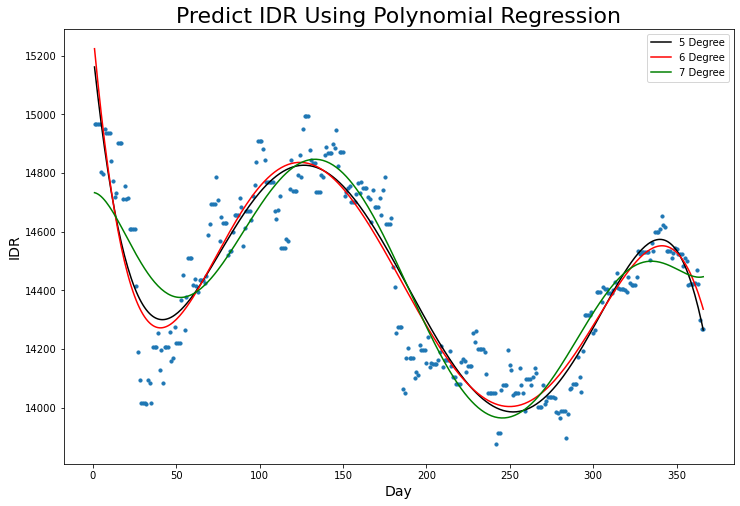

In [70]:
#Visualize polynomial model
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
plt.scatter(X,y, s=10)
plt.plot(X,polyreg5.predict(X),color="black", label="5 Degree")
plt.plot(X,polyreg6.predict(X),color="red", label="6 Degree")
plt.plot(X,polyreg7.predict(X),color="green", label="7 Degree")
plt.title("Predict IDR Using Polynomial Regression", fontsize=22)
plt.xlabel("Day", fontsize=14)
plt.ylabel("IDR", fontsize=14)
plt.legend()
plt.show()

In [71]:
#Compare the error at each model
from sklearn.metrics import mean_squared_error
import numpy as np
y_pred5 = polyreg5.predict(X_test)
y_pred6 = polyreg6.predict(X_test)
y_pred7 = polyreg7.predict(X_test)
mae5 = mean_squared_error(y_test, y_pred5)
mae6 = mean_squared_error(y_test, y_pred6)
mae7 = mean_squared_error(y_test, y_pred7)
rmse5 = np.sqrt(mae5)
rmse6 = np.sqrt(mae6)
rmse7 = np.sqrt(mae7)
print("Error at 5 Degree :", rmse5)
print("Error at 6 Degree :", rmse6)
print("Error at 7 Degree :", rmse7)

Error at 5 Degree : 116.89415092012088
Error at 6 Degree : 116.4176909830555
Error at 7 Degree : 136.1516223964615


According to the model using polynomial, the 6 degree model has an effective model for predict the IDR per 1 USD at range 08 May
2020 - May 08 2021. This model has smaller <i> root mean squared error </i> than others. This model marked by red line at graph
shown above. Furthermore, for predicting the IDR in future the model will be used is 6 degree polynomial model.

In [72]:
#Predict IDR at day 367 - 373 or at May 09 2021 - May 15 2021
day_pred_fut = []
for i in range(367, 374, 1):
    day_pred_fut.append(i)
column = ['X']
X_hat = pd.DataFrame(day_pred_fut, columns=column)
y_hat = polyreg6.predict(X_hat)

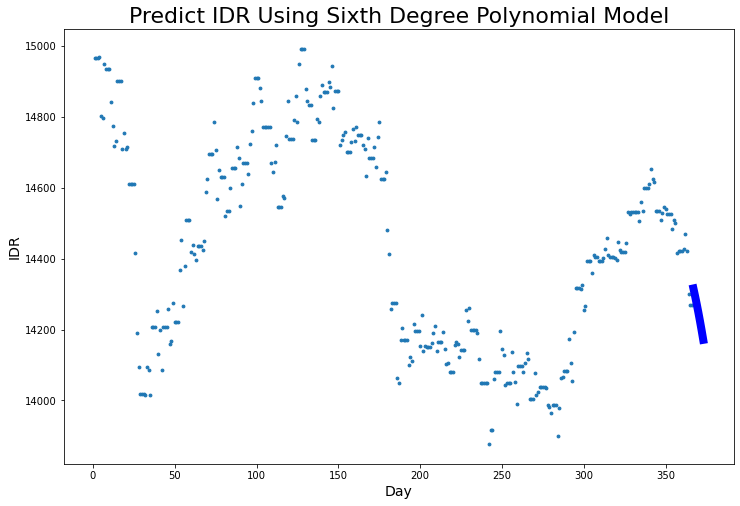

In [73]:
#Visualize the predict by using polynomial regression
plt.figure(figsize=(12,8))
plt.scatter(X,y, s=8)
plt.plot(X_hat, y_hat, color="blue", linewidth=8)
plt.title("Predict IDR Using Sixth Degree Polynomial Model", fontsize=22)
plt.xlabel("Day", fontsize=14)
plt.ylabel("IDR", fontsize=14)
plt.show()

In [78]:
#Looking the value of IDR predicted
column = ["Prediksi nilai IDR"]
y_hat = pd.DataFrame(y_hat, columns=column)
future = future.rename(columns={'ds' : 'Tanggal'})
IDR_pred = pd.concat([future, y_hat], axis=1).reindex(future.index)
print(IDR_pred)

      Tanggal  Prediksi nilai IDR
0  2021-05-09        14315.921405
1  2021-05-10        14294.617185
2  2021-05-11        14272.192811
3  2021-05-12        14248.623621
4  2021-05-13        14223.884741
5  2021-05-14        14197.951076
6  2021-05-15        14170.797323


After fitted the polynomial 6 degree to dataset and predicted the value in a week at May 09 2021 - May 15 2021. The result, as 
general ID will be decrease time by time or in another word the IDR will be stronger, which is the value can be seen above. The
result, maximum IDR predicted is Rp. 14301.023442 at May 09 2021, otherwhile, the minimum of IDR predicted is Rp. 14154.125205
at May 15 2021 or in another word, IDR will be stronger time by time.

<b> A N A L I Z E - M O D E L </b>

At this step, the model need to be evaluated. Not only fbprophet algorithm, but also the polynomial regression. The evaluation
be needed to find out the accuray of both model comparing to actual data. Therefore, the actual data IDR per 1 USD at range May
09 2021 - May 15 2021 or the date predicted is needed.

In [75]:
#Imputation Actual Data IDR at May 09 2021 - May 15 2021
df_fut = pd.read_csv('https://raw.githubusercontent.com/handrimaulud/data-science/main/Dataset/usd_idr_fut.csv', sep=';')
print(df_fut)

     DATETIME           IDR
0  2021-05-09  14270.146778
1  2021-05-10  14125.449914
2  2021-05-11  14177.649959
3  2021-05-12  14263.153986
4  2021-05-13  14334.748779
5  2021-05-14  14296.749979
6  2021-05-15  14296.749979


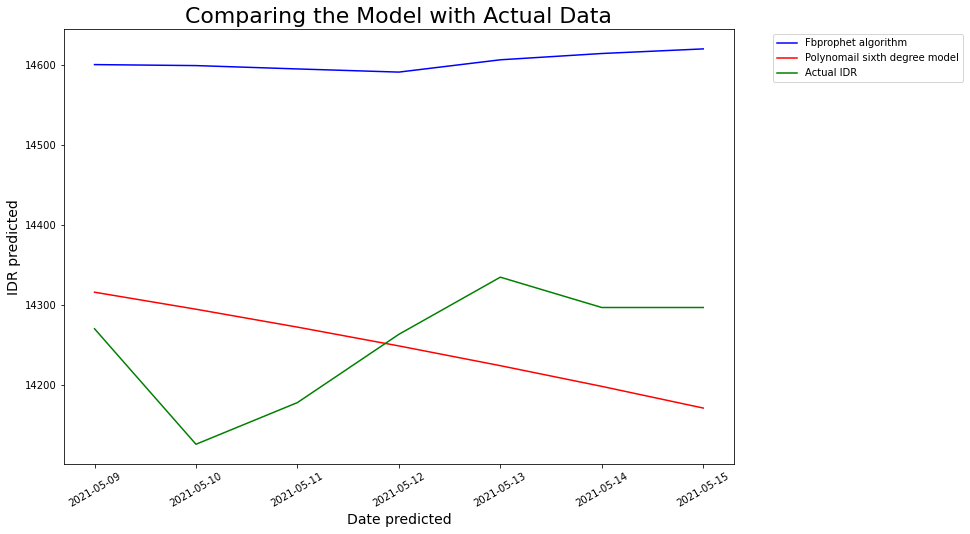

In [76]:
#Compare the fbprophet and polynomial model to actual data
plt.figure(figsize=(12,8))
plt.plot(forecast["ds"], forecast["yhat"], color='blue', label='Fbprophet algorithm')
plt.plot(forecast["ds"], y_hat, color='red', label='Polynomail sixth degree model')
plt.plot(forecast["ds"], df_fut["IDR"], color='green', label='Actual IDR')
plt.xlabel("Date predicted", fontsize=14)
plt.ylabel("IDR predicted", fontsize=14)
plt.title("Comparing the Model with Actual Data", fontsize=22)
plt.xticks(rotation=30)
plt.legend(bbox_to_anchor =(1.35, 1), ncol = 1)
plt.show()

In [77]:
#Compare the error at fbprohet and polynomial model to actual data
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

mse_pol = mean_squared_error(df_fut["IDR"], y_hat)
mse_fbprophet = mean_squared_error(df_fut["IDR"], forecast["yhat"])
mae_pol = mean_absolute_error(df_fut["IDR"], y_hat)
mae_fbprophet = mean_absolute_error(df_fut["IDR"], forecast["yhat"])
rmse_pol = np.sqrt(mse_pol)
rmse_fbprophet = np.sqrt(mse_fbprophet)
print("Mean Absolute Error Polynomial model :", mae_pol)
print("Mean Absolute Error fbprophet :", mae_fbprophet)
print('')
print("Mean Squared Error Polynomial model :", mse_pol)
print("Mean Squared Error fbprophet :", mse_fbprophet)   
print('')
print("Root Mean Squared Error Polynomial model :", rmse_pol)
print("Root Mean Squared Error fbprophet :", rmse_fbprophet)

Mean Absolute Error Polynomial model : 94.23295883158737
Mean Absolute Error fbprophet : 352.30951246679666

Mean Squared Error Polynomial model : 11111.213451853144
Mean Squared Error fbprophet : 128207.48235440081

Root Mean Squared Error Polynomial model : 105.40974078259154
Root Mean Squared Error fbprophet : 358.06072439517965


According to graph "Comparing the Model with Actual Data", can be seen that the polynomial lines marked by red line closer to 
Actual IDR line marked by green line. That is mean, the polynomial model has higher accuracy and the estimated of IDR predicted
close to actual IDR. The error of polynomial has smaller than the fbprophet algorithm can be seen above. Nevertheless, each
model has a weakness each itself like at polynomial regression comparing to forecasting algorithm which has designed to predict
in future. This weakness could be can not predict over time that has set (e.g. can not predict over a week). This weakness could
be happen due to the polynomial characteristic itself, which is the model would be monotonous (e.g. the trend of model sixth
degree polynomial has created above tend to move lower or in another word the IDR predicted tend to minus by the time if the
time over)

<b> C O N C L U T I O N </b>

Much of forecasting methods to predict a next value, one of them is regression, moving average, invertion, fbprophet algorithm, etc. Some of which has a weakness and strengthness.
Polynomial 6th orde is best model to predict IDR at May 09th 2021 - May 15th 2021 with error estimatation less if compared to fbprophet algorithm

1. There are many methods in forecasting to predict the value or number in future. Several of them are regression, moving 
average, fbprophet algorithm, etc. Which are of each model has weakness and strengthness itself.
2. At this currency exchange rates IDR - USD May 08 2020 - May 08 2021 has created above, the sixth degree polynomial model
is best mmodel to predict IDR at May 09 2021 - May 15 2021 comparing to f